# Task 1 - IRIS FLOWER CLASSIFICATION

In [19]:
#Importing he libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading the data
df = pd.read_csv('C:/Users/jj/Desktop/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.columns.tolist()

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

The iris dataset contains six variabbles

In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
#Data preprocessing
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
num_dup = df.duplicated().sum()
print(f"Number of duplicated rows: {num_dup}")


Number of duplicated rows: 3


In [10]:
df=df.drop_duplicates()
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
print(df.isnull().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [12]:
print(df.dtypes)

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [13]:
num_duplicates_rem = df.duplicated().sum()
print(f"Number of duplicated rows after removal: {num_duplicates_rem}")

Number of duplicated rows after removal: 0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


Correlation Plot

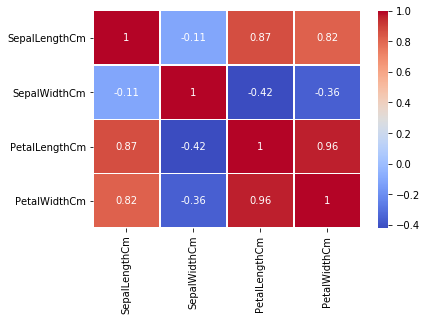

In [15]:

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

PetalWidth and PetalLength is showing strong positive correlation.

Splitting the Dataset

In [16]:
X = df.drop('Species', axis = 1)
y = df['Species']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decission Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
Decisiontree=DecisionTreeClassifier()
Decisiontree.fit(X_train,y_train)
Decisiontree_pred = Decisiontree.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, Decisiontree_pred)
conf_matrix = confusion_matrix(y_test, Decisiontree_pred)
class_report = classification_report(y_test, Decisiontree_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9333333333333333
Confusion Matrix:
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, rfc_pred)
conf_matrix = confusion_matrix(y_test, rfc_pred)
class_report = classification_report(y_test, rfc_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9333333333333333
Confusion Matrix:
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



K nearest Neighbour

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, knn_pred)
conf_matrix = confusion_matrix(y_test, knn_pred)
class_report = classification_report(y_test, knn_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9333333333333333
Confusion Matrix:
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



Decision tree, random forest, and k-Nearest Neighbors (KNN) are all machine learning models used Iris data classification. Here we used confusion matrix, accuracy score and classification report to evaluate the model.

For each model we got the same accuracy score of 0.933 indicates approximately 93.33% of the predictions made by the model match the actual true labels in the test set.